# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# Step 2: Load the Dataset

In [2]:
df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding='latin1')
print("Shape:", df.shape)
df.head()

Shape: (15433, 11)


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


# Step 3: Data Cleaning

In [3]:
# Drop unnecessary columns
df.drop(['Event_gender', 'Country_Code'], axis=1, inplace=True)

# Drop rows with missing values
df.dropna(how='all', inplace=True)

# Convert Year to integer
df = df.astype({'Year': 'int'})

# Check dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        15316 non-null  object
 1   Year        15316 non-null  int32 
 2   Sport       15316 non-null  object
 3   Discipline  15316 non-null  object
 4   Event       15316 non-null  object
 5   Athlete     15316 non-null  object
 6   Gender      15316 non-null  object
 7   Country     15316 non-null  object
 8   Medal       15316 non-null  object
dtypes: int32(1), object(8)
memory usage: 1.1+ MB
None


# Step 4: Exploratory Data Analysis (EDA)

# Q1 — Which city hosted the most Olympics?

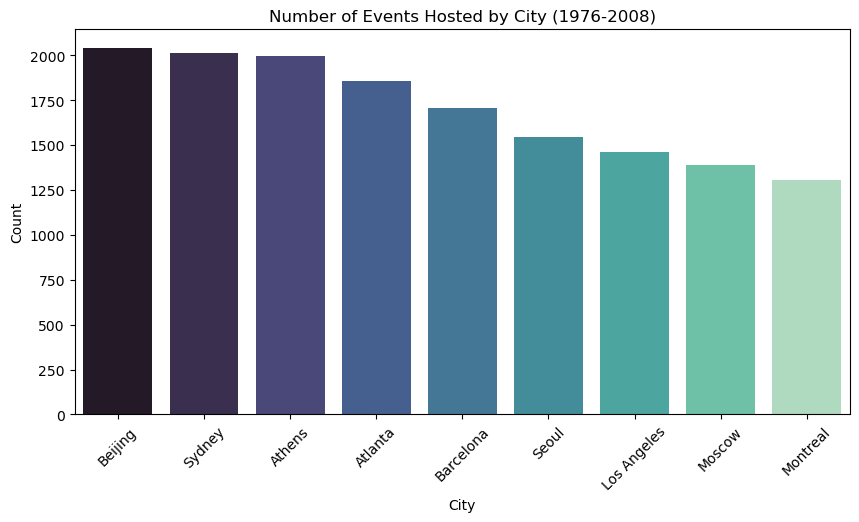

In [4]:
city_counts = df['City'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='mako')
plt.title("Number of Events Hosted by City (1976-2008)")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Q2 — Which sports have the most events?

Total unique events: 334


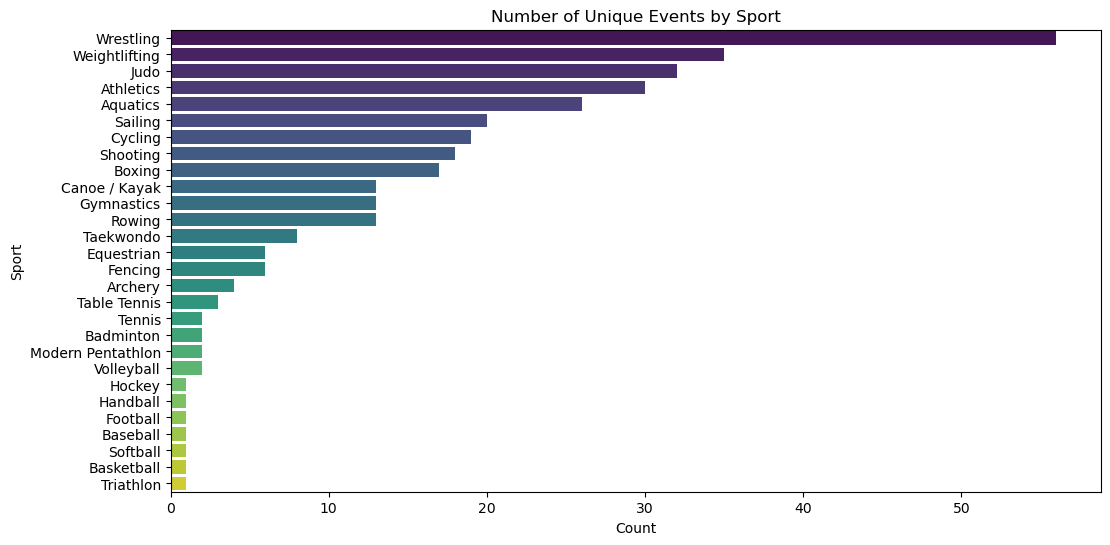

In [12]:
event_counts = df[['Sport', 'Discipline', 'Event']].drop_duplicates()
print("Total unique events:", len(event_counts))

plt.figure(figsize=(12,6))
sns.countplot(y='Sport', data=event_counts, order=event_counts['Sport'].value_counts().index, palette='viridis')
plt.title("Number of Unique Events by Sport")
plt.xlabel("Count")
plt.ylabel("Sport")
plt.show()

# Q3️ — Which athletes won the most medals?

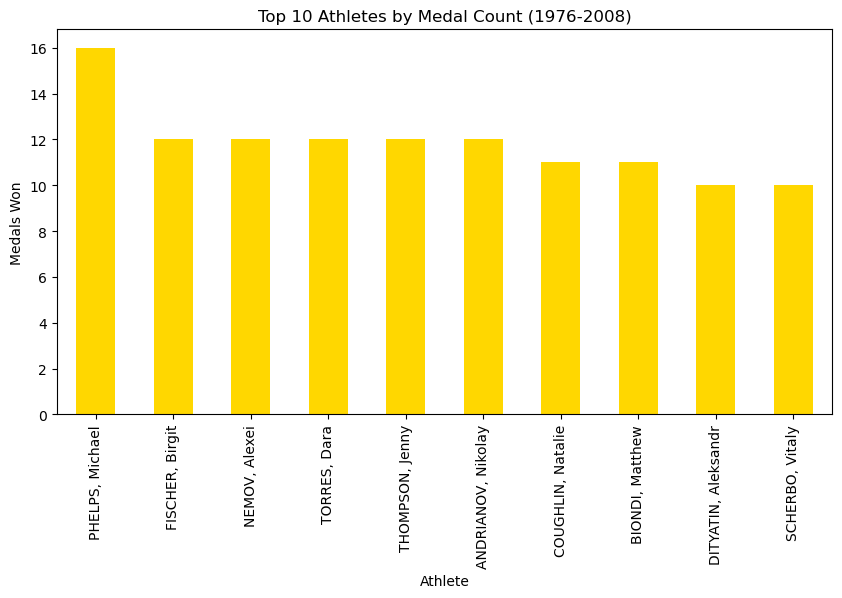

In [14]:
athlete_medals = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
athlete_medals.plot(kind='bar', color='gold')
plt.title("Top 10 Athletes by Medal Count (1976-2008)")
plt.xlabel("Athlete")
plt.ylabel("Medals Won")
plt.show()

# Q4️ — Gender distribution in medal winners

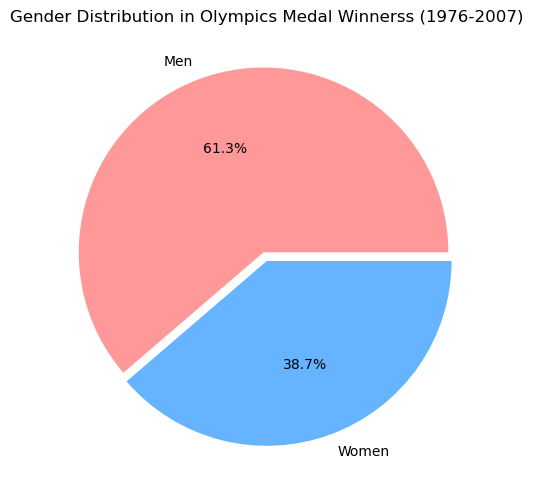

In [18]:
gender_dist = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
gender_dist.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Medal Winnerss (1976-2007)")
plt.ylabel('')
plt.show()

# Q5️ — Top 10 Countries by Total Medals

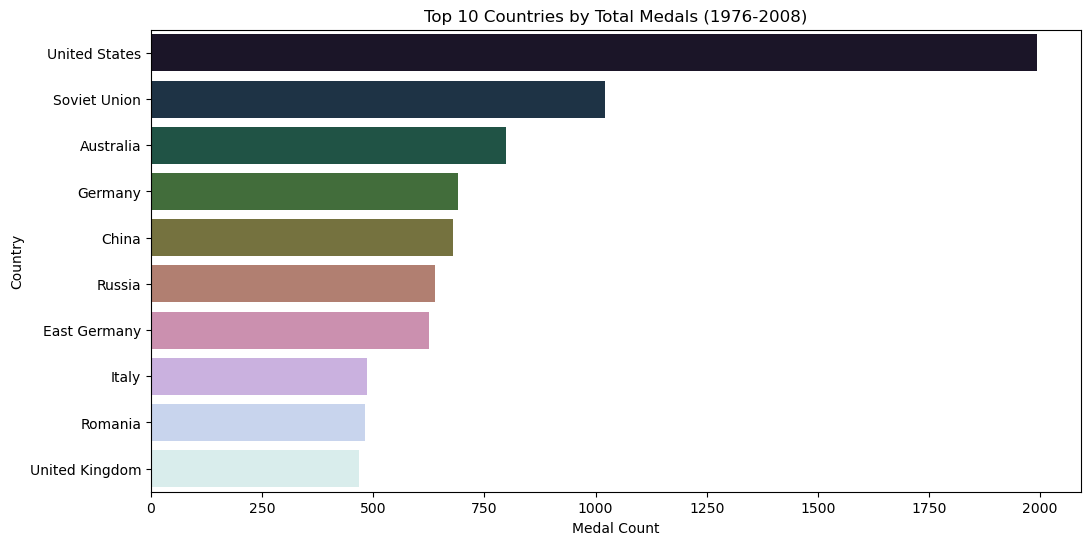

In [19]:
country_medals = df.groupby('Country')['Medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_medals.values, y=country_medals.index, palette='cubehelix')
plt.title("Top 10 Countries by Total Medals (1976-2008)")
plt.xlabel("Medal Count")
plt.ylabel("Country")
plt.show()

# Step 5: Predictive Analysis (ML Model)

In [22]:
# copy for ML
df_ml = df.copy()

# Encode categorical columns
le = LabelEncoder()
for col in ['Country', 'Sport', 'Gender']:
    df_ml[col] = le.fit_transform(df_ml[col])

# Convert Medals to binary
df_ml['Medal'] = df_ml['Medal'].map({'Gold': 3, 'Silver': 2, 'Bronze': 1})

# Features & Target
X = df_ml[['Country', 'Sport', 'Gender']]
y = df_ml[['Medal']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nconfussion Matrixp:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.35168661588683353

confussion Matrixp:
 [[927  38 564]
 [877  38 596]
 [874  30 651]]

Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.61      0.44      1529
           2       0.36      0.03      0.05      1511
           3       0.36      0.42      0.39      1555

    accuracy                           0.35      4595
   macro avg       0.35      0.35      0.29      4595
weighted avg       0.35      0.35      0.29      4595

